# Project 6: IMDB

We will be looking for the following things:

- A clear problem statement & description of the goals of your study to be included in the final report
- Data from IMDB
- Cleaned and refined data
- Visualization. Plots that describe your data and evaluate your model.
- Tree-based models (use any combination of ensemble techniques: random forests, bagging, boosting).
- A blog post presenting the results of your findings as a report to Netflix, including:
   a problem statement,
   summary statistics of the various factors (e.g. year, number of ratings, etc.),  
   your model, 
   at least 2 graphics,
   and your recommendations for next steps!

## Getting the data

### Required libraries

In [302]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
import json
import datetime
import random

# Using IMDBpie API to get data from IMDB website
from imdbpie import Imdb

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [303]:
random.seed(44)

In [2]:
# Create an instance of imdbpie

imdb = Imdb()
imdb = Imdb(anonymize=True) # to proxy requests

In [3]:
# Getting top 250 ever

top250 = imdb.top_250()

In [4]:
type(top250)

list

In [5]:
df250 = pd.DataFrame(top250)

In [6]:
df250.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1720709,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1176038,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'https://images-na.ssl-images-amazon...,806070,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'https://images-na.ssl-images-amazon...,1706683,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'https://images-na.ssl-images-amazon...,458405,8.9,tt0050083,12 Angry Men,feature,1957


In [7]:
# Function to get movie entries using OMDB API, code obtained from lab

def get_entry(entry):
    res = requests.get('http://www.omdbapi.com/?i='+entry)
    if res.status_code != 200:
        print entry, res.status_code
    else:
        print '.',
    try:
        j = json.loads(res.text)
    except ValueError:
        j = None
    return j

In [8]:
# Getting a list of title code for top250 movies
entries = list(df250['tconst'].values)

In [9]:
entries_dict_list = [get_entry(e) for e in entries]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [485]:
df = pd.DataFrame(entries_dict_list)

In [11]:
df.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,169,904"
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The early life and career of Vito Corleone in ...,https://images-na.ssl-images-amazon.com/images...,R,20 Dec 1974,True,202 min,The Godfather: Part II,movie,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,tt0071562,9.0,"800,469"
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,When the menace known as the Joker wreaks havo...,https://images-na.ssl-images-amazon.com/images...,PG-13,18 Jul 2008,True,152 min,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"1,699,835"
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,N/A,A jury holdout attempts to prevent a miscarria...,https://images-na.ssl-images-amazon.com/images...,APPROVED,01 Apr 1957,True,96 min,12 Angry Men,movie,"Reginald Rose (story), Reginald Rose (screenplay)",1957,tt0050083,8.9,"455,987"


### Get Gross

In [12]:
# Reverting to webscrapping to get gross of each movie
# Creating a function to scrap gross, company credits and technical details of each movie

def get_test(entry):
    response = requests.get('http://www.imdb.com/title/' + entry)
    html = response.text
    print html

In [13]:
get_test(entries[0])










<!DOCTYPE html>
<html
xmlns:og="http://ogp.me/ns#"
xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt0111161?src=mdot">
        
    
            <script type="text/javascript">var ue_t0=window.ue_t0||+new Date();</script>
            <script type="text/javascript">
                var ue_mid = "A1EVAM02EL8SFB"; 
                var ue_sn = "www.imdb.com";  
                var ue_furl = "fls-na.amazon.com";
                var ue_sid = "000-0000000-0000000";
                var ue_id = "03T3MZA2YJAFBMWBF9GF";
                (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}function b(m,l,h,j,i){var k={m:m,f:l,l:h,c:""+j,err:

In [14]:
# Reverting to webscrapping to get gross of each movie
# Creating a function to scrap gross, company credits and technical details of each movie

def get_gross(entry):
    response = requests.get('http://www.imdb.com/title/' + entry)
    html = response.text
    try:
        
        gross = re.findall('Gross:</h4>\s*\$([^ ]*)', html)
        return int(gross[0].replace(',',''))
    except Exception as ex:
        print ex, entry, requests.status_codes
        return None

In [15]:
gross_list = [(x,get_gross(x)) for x in entries]

list index out of range tt0050083 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0038650 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0064116 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0034583 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0021749 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0057012 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0043014 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0

In [16]:
df_gross = pd.DataFrame(gross_list, columns = ['imdbID','Gross'])

In [17]:
df_gross.head()

,imdbID,Gross
0,tt0111161,28341469.0
1,tt0068646,134821952.0
2,tt0071562,57300000.0
3,tt0468569,533316061.0
4,tt0050083,NaN


## Get sound technical details

In [18]:
# function to get technical details of movie

def get_sound(entry):
    response = requests.get('http://www.imdb.com/title/' + entry)
    html = response.text
    try:
        sound_list = re.findall('sound_mixes=([^&]*)', html)
        sound = ''
        for i in sound_list:
            sound = sound + ' ' + i
        return sound
        
    except Exception as ex:
        print entry, ex, requests.status_codes
        return None

In [19]:
get_sound(entries[0])

u' dolby_digital'

In [20]:
sound_list = [(x, get_sound(x)) for x in entries]

In [21]:
sound_list

[(u'tt0111161', u' dolby_digital'),
 (u'tt0068646', u' dts mono'),
 (u'tt0071562', u' mono'),
 (u'tt0468569', u' dolby_digital sdds dts'),
 (u'tt0050083', u' mono'),
 (u'tt0108052', u' dts dts_stereo'),
 (u'tt0110912', u' dolby_digital'),
 (u'tt0167260', u' dts_es dolby_digital_ex sdds'),
 (u'tt0060196', u' mono'),
 (u'tt0137523', u' dolby_digital dts'),
 (u'tt0120737', u' dts_es dolby_digital_ex sdds'),
 (u'tt0080684', u' 70_mm_6_track dolby_stereo'),
 (u'tt0109830', u' dts dolby_digital'),
 (u'tt1375666', u' dolby_digital dts sdds'),
 (u'tt0167261', u' dts_es dolby_digital_ex sdds'),
 (u'tt0073486', u' mono'),
 (u'tt0099685', u' dolby_sr'),
 (u'tt0133093', u' dts dolby_digital sdds'),
 (u'tt0047478', u' mono stereo'),
 (u'tt0076759', u' 70_mm_6_track dolby dts_stereo dolby_digital sdds mono'),
 (u'tt0317248', u' dolby_digital sdds'),
 (u'tt0114369', u' dts dolby_digital'),
 (u'tt0102926', u' dolby_sr'),
 (u'tt0038650', u' mono'),
 (u'tt0114814', u' dolby_digital'),
 (u'tt0118799', u'

In [45]:
df_sound = pd.DataFrame(sound_list, columns = ['imdbID','sound'])
df_sound.head()

# Planning to use a countvectorizer to break up the sound types into categorical features.

,imdbID,sound
0,tt0111161,dolby_digital
1,tt0068646,dts mono
2,tt0071562,mono
3,tt0468569,dolby_digital sdds dts
4,tt0050083,mono


## Cleaning the data

In [23]:
print (df.columns)

Index([u'Actors', u'Awards', u'Country', u'Director', u'Genre', u'Language',
       u'Metascore', u'Plot', u'Poster', u'Rated', u'Released', u'Response',
       u'Runtime', u'Title', u'Type', u'Writer', u'Year', u'imdbID',
       u'imdbRating', u'imdbVotes'],
      dtype='object')


In [24]:
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,169,904"


In [25]:
# Deleting Poster and Response columns

del df['Poster']
del df['Response']

In [28]:
# Checking values in Type column

df['Type'].value_counts()

movie    250
Name: Type, dtype: int64

In [29]:
# Delete type column since it won't be useful (all same value)

del df['Type']

In [30]:
# Replace "N/A" with ''

df.loc[:,'Awards'] = df['Awards'].apply(lambda x: (x).replace("N/A", ''))

In [31]:
# Converting runtime to integer of minutes
df.loc[:,'Runtime'] = df['Runtime'].apply(lambda x: int(x.split()[0]))

In [32]:
# Converting ratings to float
df.loc[:, 'imdbRating'] = df['imdbRating'].astype(float)

In [33]:
# Converting votes to int

df.loc[:, 'imdbVotes'] = df['imdbVotes'].apply(lambda x: int(x.replace(',','')))

In [37]:
# Replace "N/A" with np.nan

df.loc[:,'Metascore'] = df['Metascore'].apply(lambda x: (x).replace("N/A", '0'))

In [38]:
df.loc[:,'Metascore'] = df['Metascore'].astype(float)

In [41]:
df.loc[:,'Metascore'] = df['Metascore'].apply(lambda x: np.nan if x == 0 else x)

In [42]:
def change_date(x):
    try:
        return datetime.datetime.strptime(x, "%d %b %Y")
    except:
        return None

In [43]:
df.loc[:,'Released'] = df['Released'].apply(change_date)

In [211]:
df.loc[:,'Year'] = df["Year"].astype(int)

0    1994
1    1972
2    1974
3    2008
4    1957
Name: Year, dtype: int64

In [212]:
df.dtypes

Actors                 object
Awards                 object
Country                object
Director               object
Genre                  object
Language               object
Metascore             float64
Plot                   object
Rated                  object
Released       datetime64[ns]
Runtime                 int64
Title                  object
Writer                 object
Year                    int64
imdbID                 object
imdbRating            float64
imdbVotes               int64
Gross                 float64
sound                  object
win_oscar               int64
nom_oscar              object
awards_won             object
nominations             int64
dtype: object

In [50]:
df = pd.merge(df, df_gross, on= 'imdbID')
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Title,Writer,Year,imdbID,imdbRating,imdbVotes,Gross
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,142,The Shawshank Redemption,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,1711064,28341469.0
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,175,The Godfather,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,1169904,134821952.0


In [51]:
df = pd.merge(df, df_sound, on= 'imdbID')
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Title,Writer,Year,imdbID,imdbRating,imdbVotes,Gross,sound
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,142,The Shawshank Redemption,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,1711064,28341469.0,dolby_digital
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,175,The Godfather,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,1169904,134821952.0,dts mono


In [65]:
# Merging actors' name so we can countvectorizer FirstLast name together

df.loc[:, 'Actors'] = df['Actors'].apply(lambda x: x.replace('-',''))

In [69]:
# Merging Directors' name so we can countvectorizer FirstLast name together

df.loc[:, 'Director'] = df['Director'].apply(lambda x: x.replace(' ',''))

In [74]:
# Merging genres so we can countvectorizer properly

df.loc[:, 'Genre'] = df['Genre'].apply(lambda x: x.replace(' ',''))

In [78]:
# Merging Writer so we can countvectorizer properly

df.loc[:, 'Writer'] = df['Writer'].apply(lambda x: x.replace(' ',''))

In [185]:
# Merging words in country so we can countvectorizer properly

df.loc[:, 'Country'] = df['Country'].apply(lambda x: x.replace(' ',''))

In [189]:
# Merging words in sound so we can countvectorizer properly

df.loc[:, 'sound'] = df['sound'].apply(lambda x: x.replace('_',''))

In [190]:
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations
0,"TimRobbins,MorganFreeman,BobGunton,WilliamSadler",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,FrankDarabont,"Crime,Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,...,1994,tt0111161,9.3,1711064,28341469.0,dolbydigital,0,7,18,30
1,"MarlonBrando,AlPacino,JamesCaan,RichardS.Caste...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,FrancisFordCoppola,"Crime,Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,...,1972,tt0068646,9.2,1169904,134821952.0,dts mono,3,0,23,27


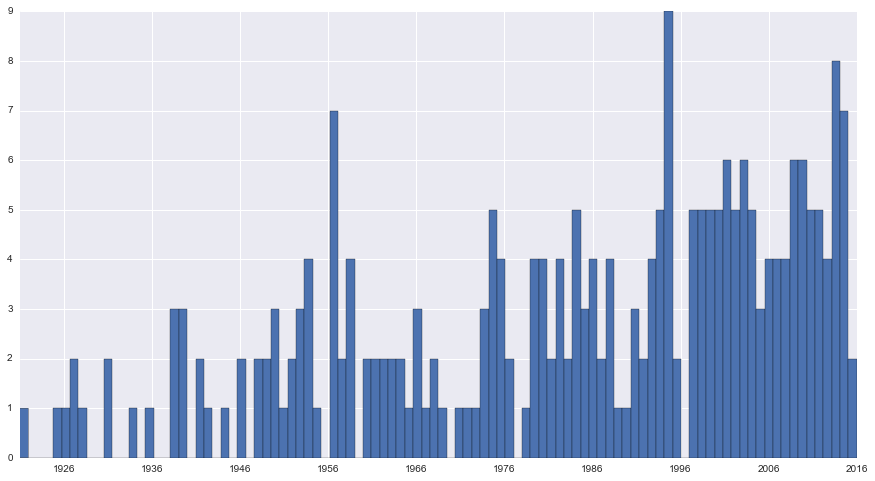

In [206]:
df['Year'].hist(figsize = (15,8), bins = 100)

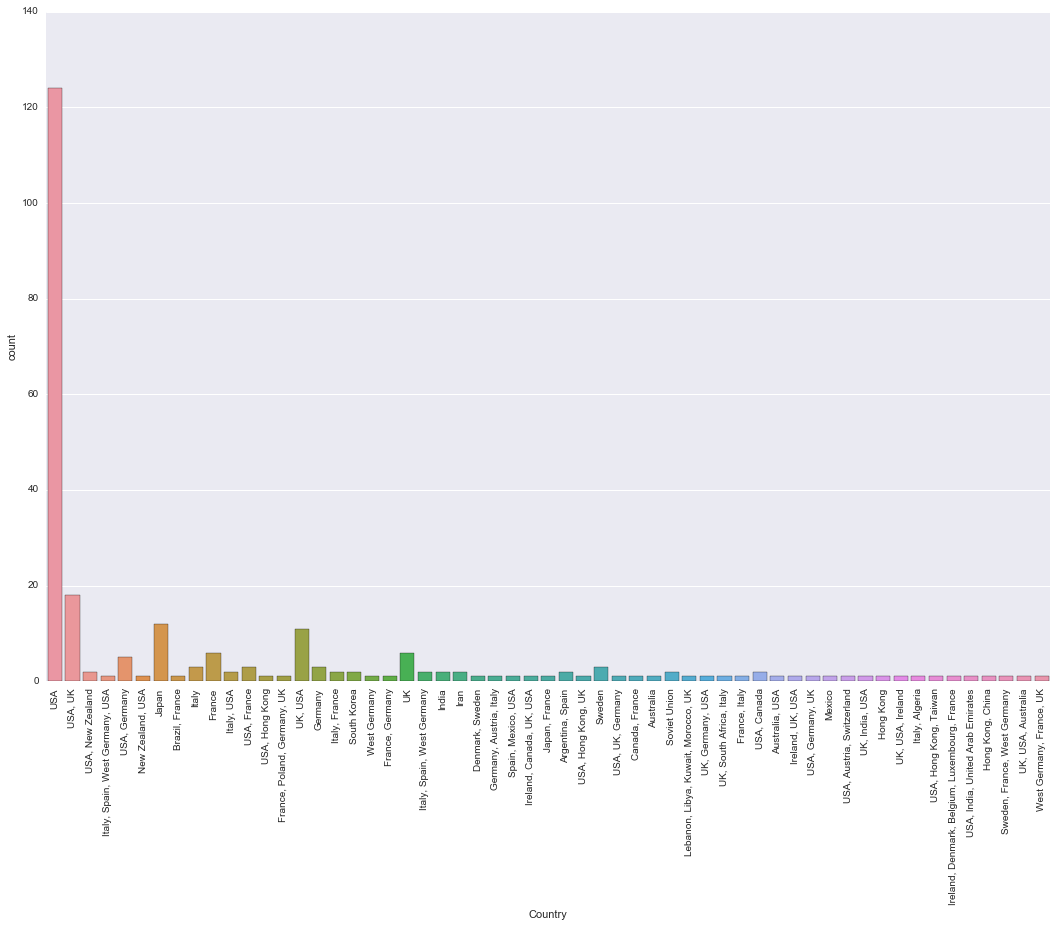

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
ax = sns.countplot(x='Country', data = df)
plt.xticks(rotation=90)
plt.savefig('movies_by_country.png')

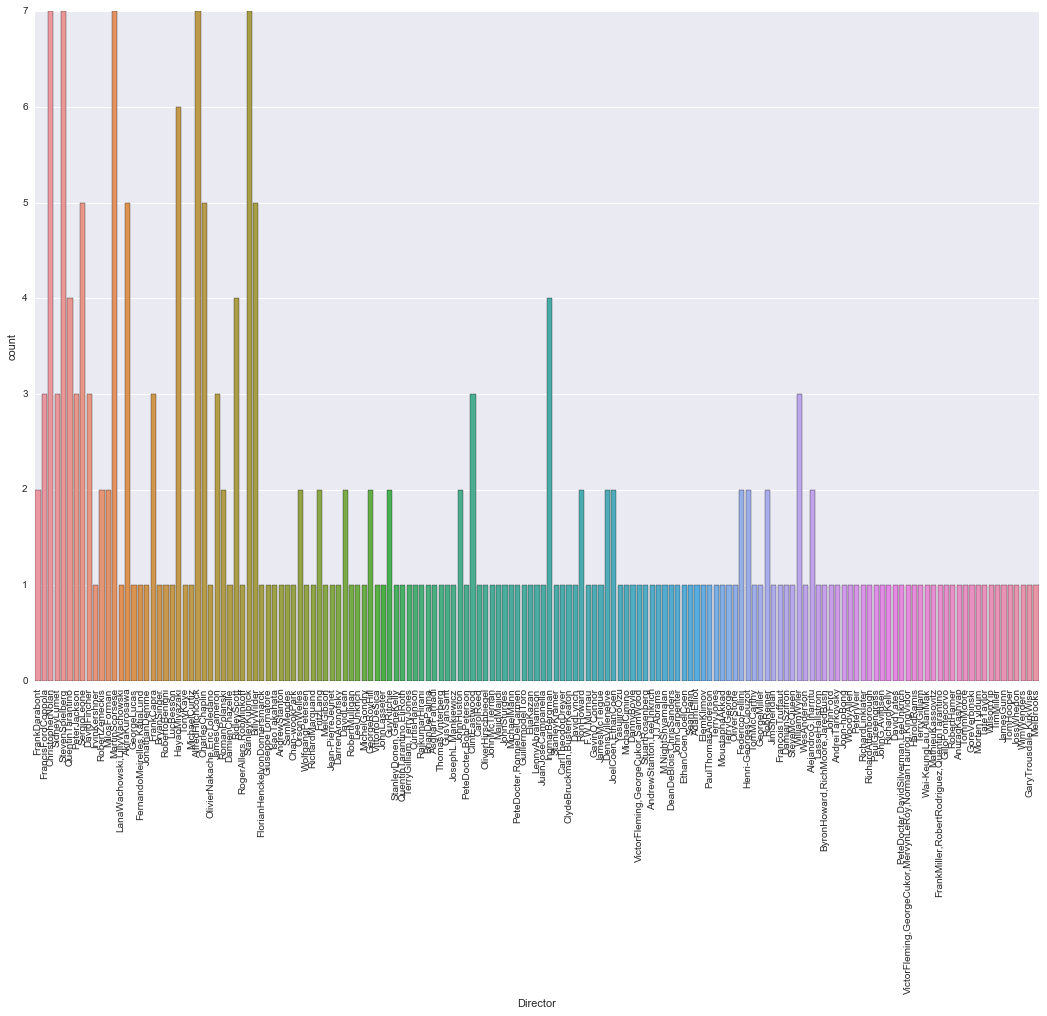

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
ax = sns.countplot(x='Director', data = df)
plt.xticks(rotation=90)
plt.savefig('movies_by_director.png')

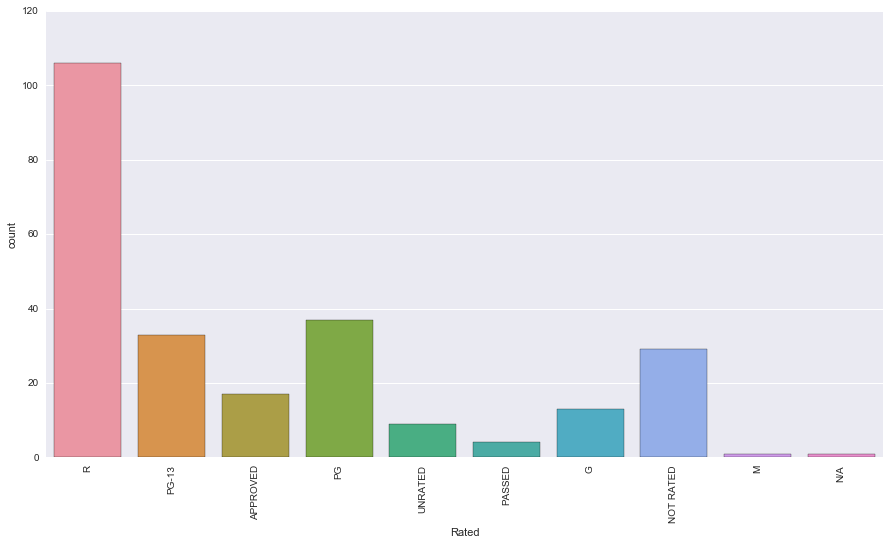

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
ax = sns.countplot(x='Rated', data = df)
plt.xticks(rotation=90)
plt.savefig('movies_by_ratings.png')

In [130]:
# Reverting to webscrapping to get gross of each movie
# Creating a function to scrap gross, company credits and technical details of each movie

def get_more_detail(entry):
    response = requests.get('http://www.imdb.com/title/' + entry)
    html = response.text
    try:
        
        gross = re.findall('<h4\sclass="inline">Gross:</h4>\s*\$([^ ]*)', html)
        return int(gross[0].replace(',',''))
    except Exception as ex:
        print ex, entry, requests.status_codes
        return None

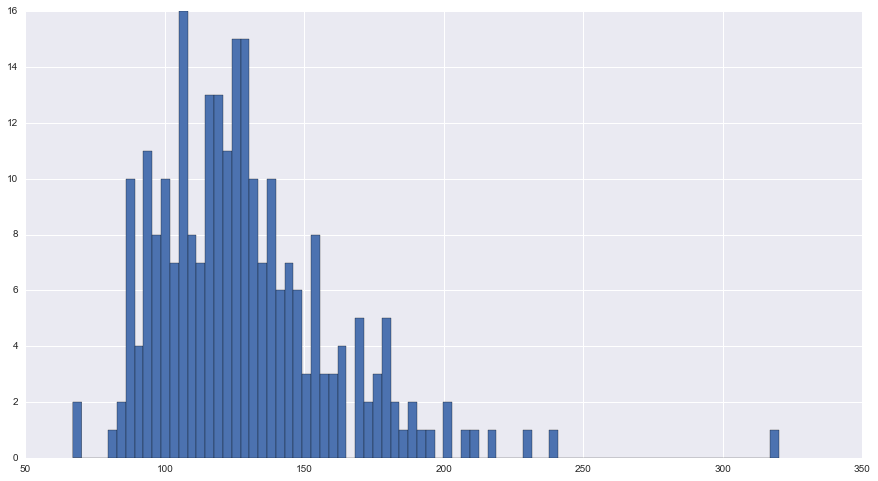

In [112]:
df['Runtime'].hist(figsize = (15,8), bins = 80)

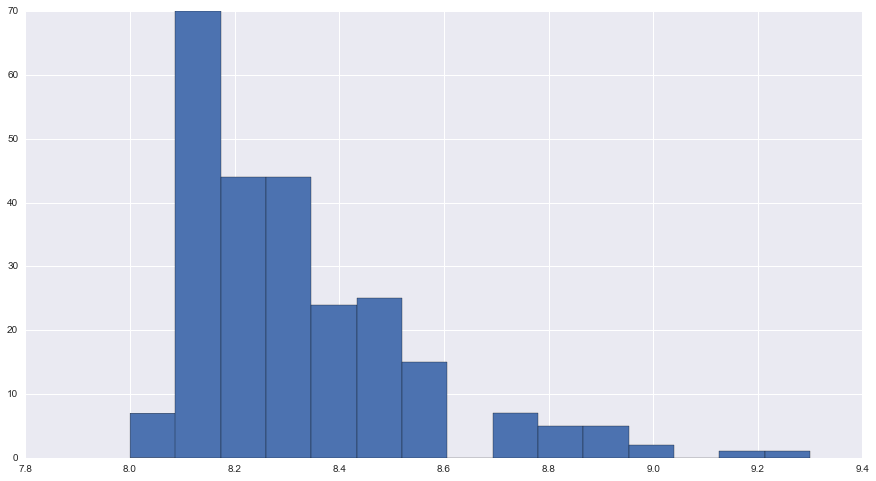

In [118]:
df['imdbRating'].hist(figsize = (15,8), bins = 15)

In [198]:
gross_df = df[df['Gross'] > 0]

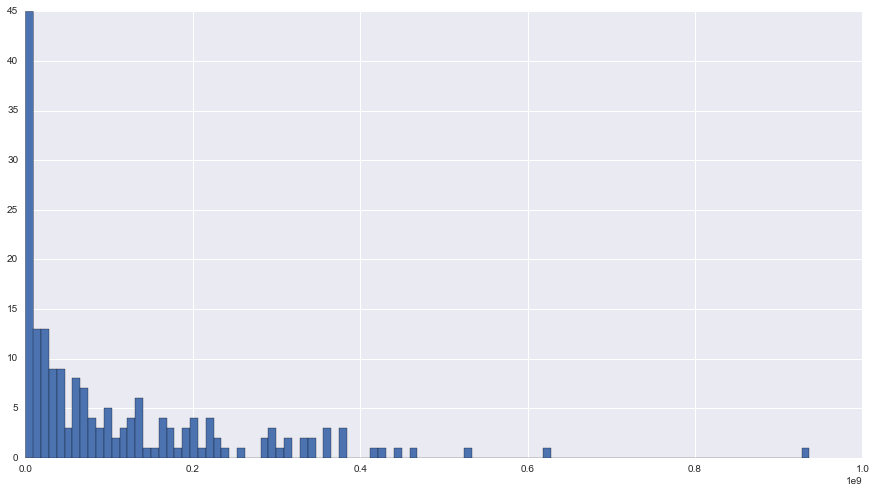

In [199]:
gross_df['Gross'].hist(figsize = (15,8), bins = 100)

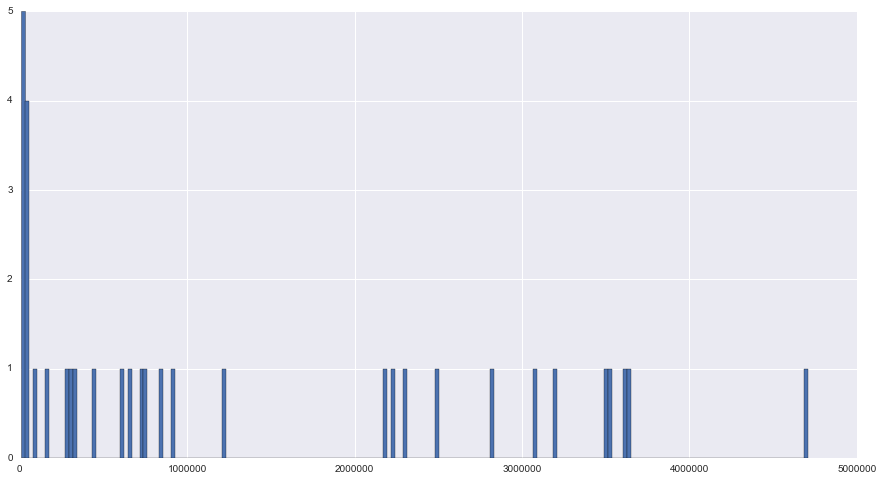

In [204]:
gross_df = df[df['Gross'] < 2000000]
gross_df['Gross'].hist(figsize = (15,8), bins = 200)

In [167]:
df.head(20)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Title,Writer,Year,imdbID,imdbRating,imdbVotes,Gross,sound
0,"TimRobbins,MorganFreeman,BobGunton,WilliamSadler",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,FrankDarabont,"Crime,Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,142,The Shawshank Redemption,"StephenKing(shortstory""RitaHayworthandShawshan...",1994,tt0111161,9.3,1711064,28341469.0,dolby_digital
1,"MarlonBrando,AlPacino,JamesCaan,RichardS.Caste...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,FrancisFordCoppola,"Crime,Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,175,The Godfather,"MarioPuzo(screenplay),FrancisFordCoppola(scree...",1972,tt0068646,9.2,1169904,134821952.0,dts mono
2,"AlPacino,RobertDuvall,DianeKeaton,RobertDeNiro",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,FrancisFordCoppola,"Crime,Drama","English, Italian, Spanish, Latin, Sicilian",80.0,The early life and career of Vito Corleone in ...,R,1974-12-20,202,The Godfather: Part II,"FrancisFordCoppola(screenplay),MarioPuzo(scree...",1974,tt0071562,9.0,800469,57300000.0,mono
3,"ChristianBale,HeathLedger,AaronEckhart,Michael...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",ChristopherNolan,"Action,Crime,Drama","English, Mandarin",82.0,When the menace known as the Joker wreaks havo...,PG-13,2008-07-18,152,The Dark Knight,"JonathanNolan(screenplay),ChristopherNolan(scr...",2008,tt0468569,9.0,1699835,533316061.0,dolby_digital sdds dts
4,"MartinBalsam,JohnFiedler,LeeJ.Cobb,E.G.Marshall",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,SidneyLumet,"Crime,Drama",English,NaN,A jury holdout attempts to prevent a miscarria...,APPROVED,1957-04-01,96,12 Angry Men,"ReginaldRose(story),ReginaldRose(screenplay)",1957,tt0050083,8.9,455987,NaN,mono
5,"LiamNeeson,BenKingsley,RalphFiennes,CarolineGo...",Won 7 Oscars. Another 71 wins & 33 nominations.,USA,StevenSpielberg,"Biography,Drama,History","English, Hebrew, German, Polish",93.0,"In German-occupied Poland during World War II,...",R,1994-02-04,195,Schindler's List,"ThomasKeneally(book),StevenZaillian(screenplay)",1993,tt0108052,8.9,877500,96067179.0,dts dts_stereo
6,"TimRoth,AmandaPlummer,LauraLovelace,JohnTravolta",Won 1 Oscar. Another 60 wins & 65 nominations.,USA,QuentinTarantino,"Crime,Drama","English, Spanish, French",94.0,"The lives of two mob hit men, a boxer, a gangs...",R,1994-10-14,154,Pulp Fiction,"QuentinTarantino(story),RogerAvary(story),Quen...",1994,tt0110912,8.9,1343852,107930000.0,dolby_digital
7,"NoelAppleby,AliAstin,SeanAstin,DavidAston",Won 11 Oscars. Another 174 wins & 113 nominati...,"USA, New Zealand",PeterJackson,"Action,Adventure,Drama","English, Quenya, Old English, Sindarin",94.0,Gandalf and Aragorn lead the World of Men agai...,PG-13,2003-12-17,201,The Lord of the Rings: The Return of the King,"J.R.R.Tolkien(novel),FranWalsh(screenplay),Phi...",2003,tt0167260,8.9,1230433,377019252.0,dts_es dolby_digital_ex sdds
8,"EliWallach,ClintEastwood,LeeVanCleef,AldoGiuffrè",1 win & 1 nomination.,"Italy, Spain, West Germany, USA",SergioLeone,Western,Italian,90.0,A bounty hunting scam joins two men in an unea...,APPROVED,1967-12-29,161,"The Good, the Bad and the Ugly","LucianoVincenzoni(story),SergioLeone(story),Ag...",1966,tt0060196,8.9,510591,6100000.0,mono
9,"EdwardNorton,BradPitt,MeatLoaf,ZachGrenier",Nominated for 1 Oscar. Another 10 wins & 31 no...,"USA, Germany",DavidFincher,Drama,English,66.0,"An insomniac office worker, looking for a way ...",R,1999-10-15,139,Fight Club,"ChuckPalahniuk(novel),JimUhls(screenplay)",1999,tt0137523,8.8,1373233,37023395.0,dolby_digital dts


## Unpacking Awards column

In [177]:
def win_oscar(x):
    try:
        return int(re.findall('Won\s(\d)\sOscars',x)[0])
    except:
        return 0

In [178]:
df['win_oscar'] = df['Awards'].apply(win_oscar)

In [164]:
def nom_oscar(x):
    try:
        return int(re.findall('Nominated\sfor\s(\d)\sOscar',x)[0])
    except:
        return 0

In [179]:
df['nom_oscar'] = df['Awards'].apply(nom_oscar)

In [168]:
def wins(x):
    try:
        return int(re.findall('(\d+)\swin',x)[0])
    except:
        return 0

In [180]:
df['awards_won'] = df['Awards'].apply(wins)

In [175]:
def nom(x):
    try:
        return int(re.findall('(\d+)\snomination',x)[0])
    except:
        return 0

In [181]:
df['nominations'] = df['Awards'].apply(nom)

In [182]:
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations
0,"TimRobbins,MorganFreeman,BobGunton,WilliamSadler",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,FrankDarabont,"Crime,Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,...,1994,tt0111161,9.3,1711064,28341469.0,dolby_digital,0,7,18,30
1,"MarlonBrando,AlPacino,JamesCaan,RichardS.Caste...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,FrancisFordCoppola,"Crime,Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,...,1972,tt0068646,9.2,1169904,134821952.0,dts mono,3,0,23,27


## Creating count vectorizer for keywords

In [67]:
# Generic vectorizer

v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=50, # Only use the top 20 most common words
)

### Vectorizing Actors

In [71]:
# This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
actors = v.fit_transform(df.Actors).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "actor_"+ i    
    col_n.append(j)

actors = pd.DataFrame(actors, columns= col_n)
actors.head()

,actor_alecguinness,actor_alpacino,actor_benaffleck,actor_beniciodeltoro,actor_benkingsley,actor_bibiandersson,actor_bradpitt,actor_brucewillis,actor_carrieannemoss,actor_carriefisher,...,actor_seanastin,actor_sigourneyweaver,actor_stevebuscemi,actor_takashishimura,actor_timallen,actor_timroth,actor_tomhanks,actor_tomhardy,actor_toshirômifune,actor_williamholden
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
actors_df = pd.DataFrame(actors.sum())
actors_df.columns = ['Count']
actors_df.sort_values(['Count'],inplace = True)
actors_df.head()

,Count
actor_robertshaw,2
actor_martinsheen,2
actor_michaelbiehn,2
actor_jenniferconnelly,2
actor_murrayabraham,2


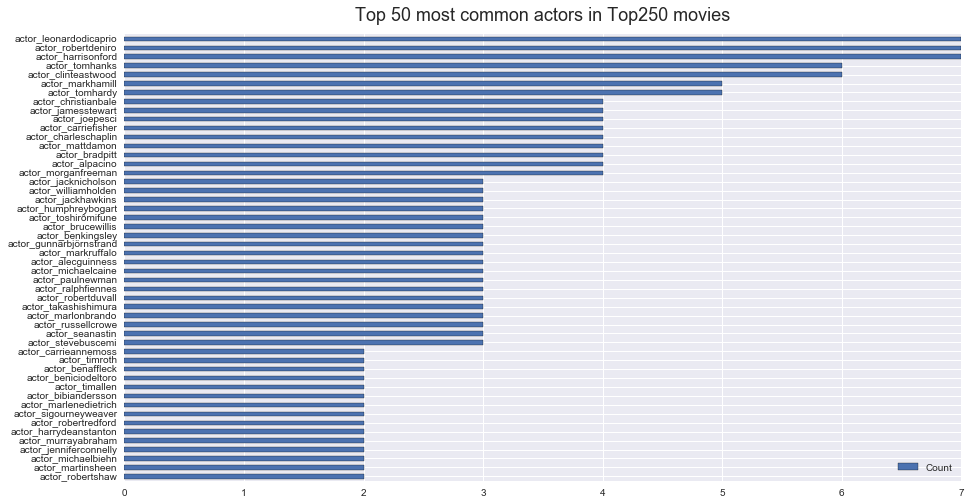

In [107]:
ax = actors_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 50 most common actors in Top250 movies', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('top50_actors.png')

### Vectorizing directors

In [72]:
direct = v.fit_transform(df.Director).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "dir_"+ i    
    col_n.append(j)

direct = pd.DataFrame(direct, columns= col_n)
direct.head()

,dir_akirakurosawa,dir_alejandrog,dir_alfredhitchcock,dir_andrewstanton,dir_billywilder,dir_charleschaplin,dir_christophernolan,dir_clinteastwood,dir_davidfincher,dir_davidlean,...,dir_ronhoward,dir_sergioleone,dir_sidneylumet,dir_stanleykubrick,dir_stevenspielberg,dir_terrygilliam,dir_terryjones,dir_victorfleming,dir_wesanderson,dir_williamwyler
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


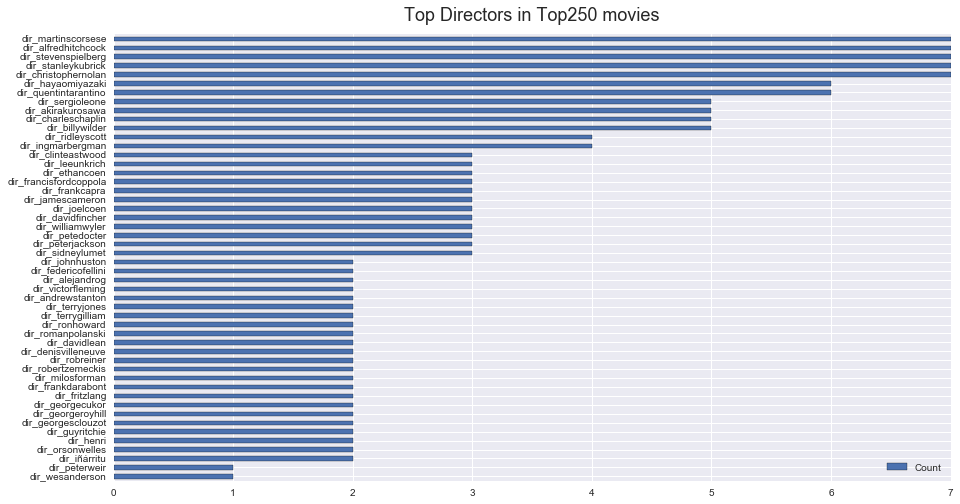

In [108]:
direct_df = pd.DataFrame(direct.sum())
direct_df.columns = ['Count']
direct_df.sort_values(['Count'],inplace = True)
direct_df.head()

ax = direct_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top Directors in Top250 movies', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('top_directors.png')

### Vectorizing genres

In [76]:
genre = v.fit_transform(df.Genre).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "genre_"+ i    
    col_n.append(j)

genre = pd.DataFrame(genre, columns= col_n)
genre.head()

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_drama,genre_family,genre_fantasy,genre_fi,...,genre_music,genre_musical,genre_mystery,genre_noir,genre_romance,genre_sci,genre_sport,genre_thriller,genre_war,genre_western
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorizing Language

In [77]:
lang = v.fit_transform(df.Language).todense()

col = v.get_feature_names()

lang = pd.DataFrame(lang, columns= col)
lang.head()

,american,arabic,belarusian,cantonese,czech,danish,english,esperanto,french,gaelic,...,spanish,swahili,swedish,thai,turkish,urdu,vietnamese,xhosa,yiddish,zulu
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorizing Plot

In [135]:
plot = v.fit_transform(df.Plot).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "plot_"+ i    
    col_n.append(j)

plot = pd.DataFrame(plot, columns= col_n)
plot.head()

,plot_american,plot_boy,plot_child,plot_city,plot_corruption,plot_crime,plot_dead,plot_death,plot_empire,plot_falls,...,plot_time,plot_tries,plot_true,plot_war,plot_way,plot_wife,plot_woman,plot_work,plot_world,plot_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


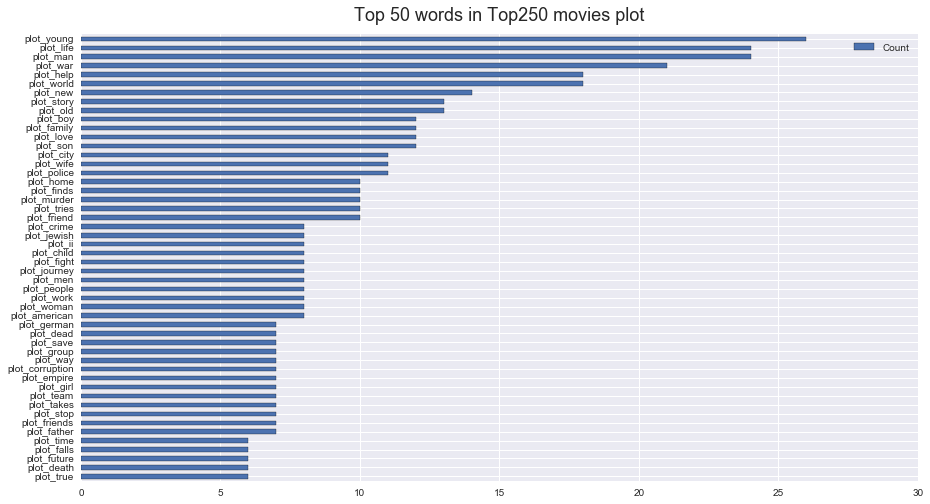

In [138]:
plot_df = pd.DataFrame(plot.sum())
plot_df.columns = ['Count']
plot_df.sort_values(['Count'],inplace = True)

ax = plot_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 50 words in Top250 movies plot', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('top_words_in_plot.png')

### Vectorizing titles

In [142]:
title = v.fit_transform(df.Title).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "title_"+ i    
    col_n.append(j)

title = pd.DataFrame(title, columns= col_n)
title.head()

,title_12,title_american,title_beautiful,title_beauty,title_castle,title_city,title_dark,title_day,title_dog,title_dollars,...,title_sunrise,title_terminator,title_time,title_toy,title_train,title_wall,title_wars,title_wild,title_wind,title_years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


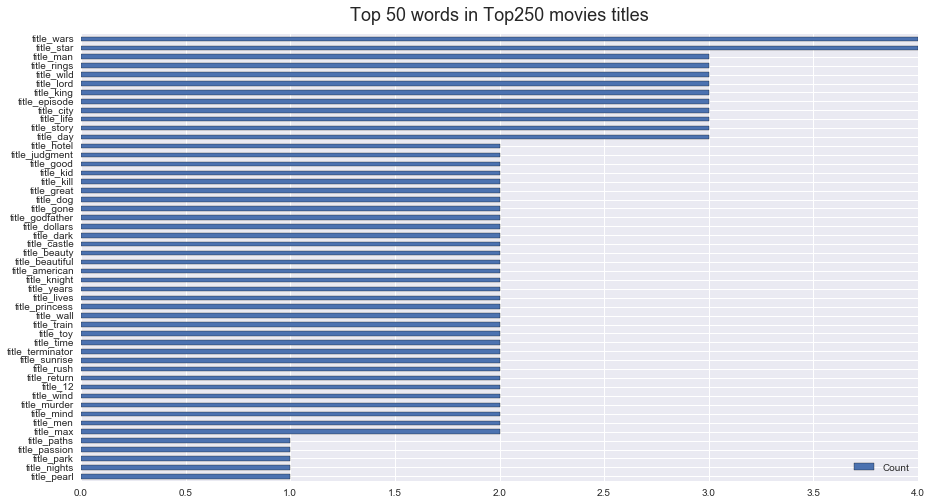

In [143]:
title_df = pd.DataFrame(title.sum())
title_df.columns = ['Count']
title_df.sort_values(['Count'],inplace = True)

ax = title_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 50 words in Top250 movies titles', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('top_words_in_title.png')

### Vectorizing countries

In [187]:
country = v.fit_transform(df.Country).todense()

col = v.get_feature_names()

country = pd.DataFrame(country, columns= col)
country.head()

,algeria,argentina,australia,austria,belgium,brazil,canada,china,denmark,france,...,southkorea,sovietunion,spain,sweden,switzerland,taiwan,uk,unitedarabemirates,usa,westgermany
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


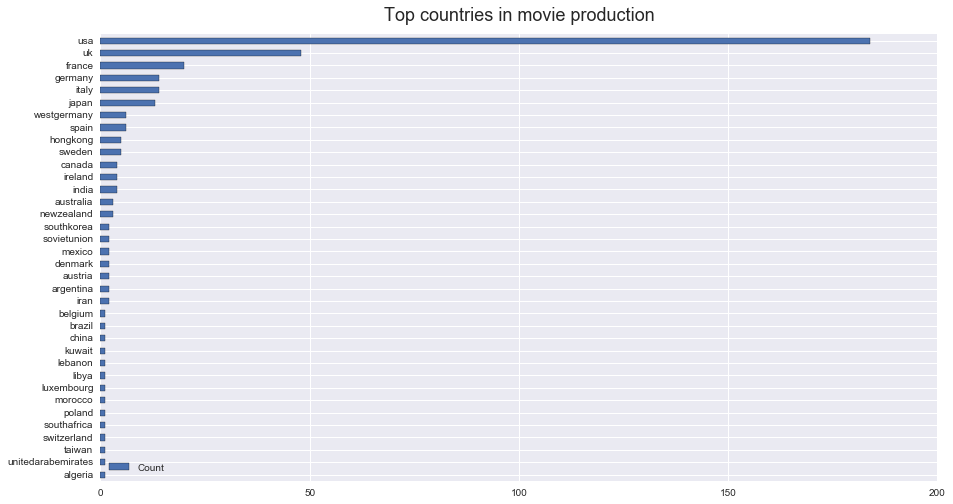

In [188]:
country_df = pd.DataFrame(country.sum())
country_df.columns = ['Count']
country_df.sort_values(['Count'],inplace = True)

ax = country_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top countries in movie production', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('top_countries_movies.png')

### Vectorizing sound column

In [191]:
sound = v.fit_transform(df.sound).todense()

col = v.get_feature_names()

sound = pd.DataFrame(sound, columns= col)
sound.head()

,12trackdigitalsound,4trackstereo,6trackstereo,70mm6track,agasoundsystem,auro11,cds,datasat,dolby,dolbyatmos,...,dts70mm,dtses,dtsstereo,imax6track,mono,perspectastereo,sdds,silent,sonicsddp,stereo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


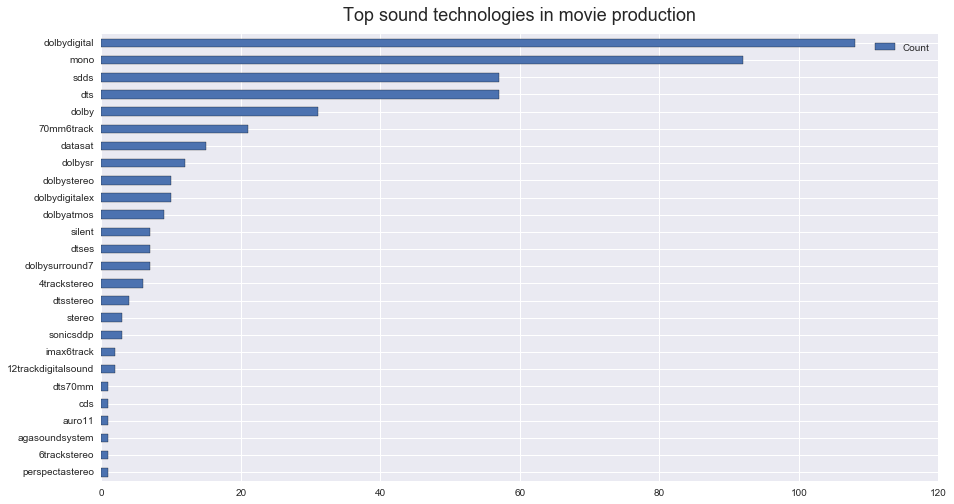

In [192]:
sound_df = pd.DataFrame(sound.sum())
sound_df.columns = ['Count']
sound_df.sort_values(['Count'],inplace = True)

ax = sound_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top sound technologies in movie production', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('top_sound_in_movies.png')

### Get dummy variables for categorical columns

In [213]:
df.head(1)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations
0,"TimRobbins,MorganFreeman,BobGunton,WilliamSadler",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,FrankDarabont,"Crime,Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,...,1994,tt0111161,9.3,1711064,28341469.0,dolbydigital,0,7,18,30


In [214]:
df_rate = pd.get_dummies(df['Rated'])
df_rate.head()

,APPROVED,G,M,N/A,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Concatenating all columns together

#### Selecting continuous columns from df

In [226]:
df.loc[:, ['nom_oscar', 'awards_won']] = df[['nom_oscar', 'awards_won']].astype(int)

In [228]:
want_list = ['Metascore', 'Year', 'Runtime', \
             'imdbVotes', 'Gross', 'win_oscar', \
             'nom_oscar', 'awards_won', 'nominations']

In [232]:
# Showing number of rows with NaN values within Gross column

len(df[df['Gross'].isnull()])

65

In [264]:
# Using median and MAD since there are outliers in the dataset

a = df['Gross'].median()

In [269]:
b = df['Gross'].mad()

In [304]:
df.loc[:, 'Gross'] = df['Gross'].apply(lambda x:x if x > 0 else abs(a + (np.random.normal() * b)))

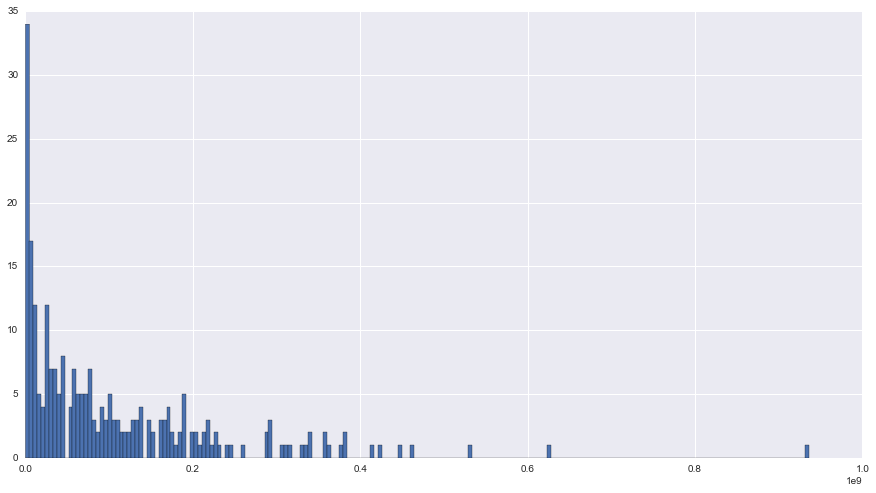

In [306]:
df['Gross'].hist(figsize = (15,8), bins = 200)

In [309]:
a = df['Metascore'].mean()
b = df['Metascore'].std()

df.loc[:, 'Metascore'] = df['Metascore'].apply(lambda x:x if x > 0 else abs(a + (np.random.normal() * b)))

In [233]:
# Showing number of rows with NaN values within Metascore column

len(df[df['Metascore'].isnull()])

82

In [307]:
df[want_list].dtypes

Metascore      float64
Year             int64
Runtime          int64
imdbVotes        int64
Gross          float64
win_oscar        int64
nom_oscar        int64
awards_won       int64
nominations      int64
dtype: object

#### Scaling continuous columns

In [310]:
scaler = StandardScaler()
df.loc[:, want_list] = scaler.fit_transform(df[want_list])

In [312]:
# We need to concatenate the following

# Scaled original df with only columns from "want_list"
# actors df (actors)
# directors df (direct)
# genre df
# lang df
# plot df
# title df
# country df
# sound df
# df_rate

# target is IMDBratings

y = df['imdbRating']

In [326]:
X = pd.concat([df[want_list], actors, direct, genre, lang, plot, title, country, sound, df_rate], axis=1)
X.head()

,Metascore,Year,Runtime,imdbVotes,Gross,win_oscar,nom_oscar,awards_won,nominations,actor_alecguinness,...,APPROVED,G,M,N/A,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,0.032833,0.416280,0.415256,3.844406,-0.611860,-0.598063,3.828183,-0.281063,-0.127810,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.923101,-0.492989,1.447454,2.242903,0.248219,0.863004,-0.491172,-0.141591,-0.190585,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.032833,-0.410328,2.291980,1.149600,-0.377952,2.324071,-0.491172,-0.504217,-0.337059,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.221860,0.994905,0.728044,3.811175,3.466991,0.375981,-0.491172,3.289403,2.215787,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.183990,-1.112945,-1.023565,0.130144,0.366937,-0.598063,1.359980,-0.336851,-0.588159,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [327]:
X.shape

(250, 350)

## Modelling

In [331]:
from sklearn.cross_validation import cross_val_score, KFold, cross_val_predict

from sklearn.grid_search import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [370]:
rand_state = 4

In [342]:
model_list = [
    
    ('DecisionTreeRegressor',DecisionTreeRegressor(random_state=rand_state)),
    ('RandomForestRegressor', RandomForestRegressor(random_state=rand_state)),
    ('ExtraTreesRegressor', ExtraTreesRegressor(random_state=rand_state)),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=rand_state)),
    ('AdaBoostRegressor', AdaBoostRegressor(random_state=rand_state))
]

## Trying vanilla models

In [365]:
def plain_model(clf):
    score = cross_val_score(clf, X, y, scoring='neg_mean_squared_error', cv = 10)
    return score

In [438]:
# Consolidating model performances
model_performance = []

for i in model_list:
    result = plain_model(i[1])
    model_performance.append([i[0], result.mean(), result.std()])

In [439]:
# Converting performance list into dataframe

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = False, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
3,GradientBoostingRegressor,-0.038576,0.043393
1,RandomForestRegressor,-0.042684,0.047705
4,AdaBoostRegressor,-0.046720,0.064384
2,ExtraTreesRegressor,-0.051102,0.058753
0,DecisionTreeRegressor,-0.070000,0.045501


## Introducing bagging

In [440]:
for i in model_list:
    result = plain_model(BaggingRegressor(i[1], random_state=rand_state))
    model_performance.append([i[0] + "+ Bagging", result.mean(), result.std()])

In [441]:
mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = False, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
3,GradientBoostingRegressor,-0.038576,0.043393
8,GradientBoostingRegressor+ Bagging,-0.042402,0.055712
1,RandomForestRegressor,-0.042684,0.047705
6,RandomForestRegressor+ Bagging,-0.043925,0.057082
5,DecisionTreeRegressor+ Bagging,-0.045376,0.051665
9,AdaBoostRegressor+ Bagging,-0.046592,0.065447
4,AdaBoostRegressor,-0.046720,0.064384
7,ExtraTreesRegressor+ Bagging,-0.047665,0.064297
2,ExtraTreesRegressor,-0.051102,0.058753
0,DecisionTreeRegressor,-0.070000,0.045501


## Introducing GridSearchCV

In [442]:
# DecisionTreeRegressor + GridSearchCV

params = {
    'splitter' : ['best', 'random'], \
    'min_samples_split' : np.arange(0.1, 1.0, 0.1), \
    'min_samples_leaf' : np.arange(0.1, 0.5, 0.1), \
    'min_weight_fraction_leaf' : np.arange(0, 0.5, 0.1), \
    'max_features' : np.arange(0.1, 1.0, 0.1), \
    'min_impurity_split' : [1e-07, 1e-08, 5e-08], \
    'presort' : [True, False]
}

gsdt = GridSearchCV(DecisionTreeRegressor(random_state = rand_state), param_grid=params, \
                    scoring='neg_mean_squared_error', cv = 5)

In [443]:
gsdt.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=4,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'presort': [True, False], 'splitter': ['best', 'random'], 'min_impurity_split': [1e-07, 1e-08, 5e-08], 'min_samples_leaf': array([ 0.1,  0.2,  0.3,  0.4]), 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]), 'min_weight_fraction_leaf': array([ 0. ,  0.1,  0.2,  0.3,  0.4]), 'min_samples_split': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [444]:
gsdt.best_params_

{'max_features': 0.90000000000000002,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 0.10000000000000001,
 'min_samples_split': 0.10000000000000001,
 'min_weight_fraction_leaf': 0.0,
 'presort': True,
 'splitter': 'best'}

In [445]:
result = plain_model(gsdt.best_estimator_)
model_performance.append(['Dt_with_GSCV', result.mean(), result.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = False, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
3,GradientBoostingRegressor,-0.038576,0.043393
8,GradientBoostingRegressor+ Bagging,-0.042402,0.055712
1,RandomForestRegressor,-0.042684,0.047705
6,RandomForestRegressor+ Bagging,-0.043925,0.057082
5,DecisionTreeRegressor+ Bagging,-0.045376,0.051665
9,AdaBoostRegressor+ Bagging,-0.046592,0.065447
4,AdaBoostRegressor,-0.046720,0.064384
7,ExtraTreesRegressor+ Bagging,-0.047665,0.064297
2,ExtraTreesRegressor,-0.051102,0.058753
10,Dt_with_GSCV,-0.054763,0.061308


In [476]:
# RandomForestRegressor  + GridSearchCV

params = {
    'n_estimators' : np.arange(5,20,1), 
    'min_samples_split' : np.arange(2, 8, 1), 
    'max_features' : np.arange(0.1,1,0.1),
}

gsrf = GridSearchCV(RandomForestRegressor(random_state = rand_state, criterion='mse'), param_grid=params, \
                    scoring='neg_mean_squared_error', cv = 5)

In [477]:
gsrf.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=4,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), 'min_samples_split': array([2, 3, 4, 5, 6, 7]), 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [480]:
gsrf.best_params_

{'max_features': 0.90000000000000002,
 'min_samples_split': 5,
 'n_estimators': 18}

In [481]:
result = plain_model(gsrf.best_estimator_)
model_performance.append(['RF_with_GSCV', result.mean(), result.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = False, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
3,GradientBoostingRegressor,-0.038576,0.043393
8,GradientBoostingRegressor+ Bagging,-0.042402,0.055712
11,RF_with_GSCV,-0.042520,0.051308
1,RandomForestRegressor,-0.042684,0.047705
6,RandomForestRegressor+ Bagging,-0.043925,0.057082
5,DecisionTreeRegressor+ Bagging,-0.045376,0.051665
9,AdaBoostRegressor+ Bagging,-0.046592,0.065447
4,AdaBoostRegressor,-0.046720,0.064384
7,ExtraTreesRegressor+ Bagging,-0.047665,0.064297
2,ExtraTreesRegressor,-0.051102,0.058753


In [450]:
# GradientBoostingRegressor + GridSearchCV

params = {
    'loss' : ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators' : np.arange(50,500, 25),
    'max_depth' : np.arange(2,20,1),
    'max_features' : ['auto', 'sqrt', 'log2']
    
}

gsgb = GridSearchCV(GradientBoostingRegressor(random_state = rand_state, criterion='mse'), param_grid=params, \
                    scoring='neg_mean_squared_error', cv = 5)

In [451]:
gsgb.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475]), 'loss': ['ls', 'lad', 'huber', 'quantile'], 'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [452]:
gsgb.best_params_

{'loss': 'huber', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 450}

In [482]:
result = plain_model(gsgb.best_estimator_)
model_performance.append(['GB_with_GSCV', result.mean(), result.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = False, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
12,GB_with_GSCV,-0.037750,0.037261
3,GradientBoostingRegressor,-0.038576,0.043393
8,GradientBoostingRegressor+ Bagging,-0.042402,0.055712
11,RF_with_GSCV,-0.042520,0.051308
1,RandomForestRegressor,-0.042684,0.047705
6,RandomForestRegressor+ Bagging,-0.043925,0.057082
5,DecisionTreeRegressor+ Bagging,-0.045376,0.051665
9,AdaBoostRegressor+ Bagging,-0.046592,0.065447
4,AdaBoostRegressor,-0.046720,0.064384
7,ExtraTreesRegressor+ Bagging,-0.047665,0.064297


In [512]:
# Setting the best gradient boost model

gb_best = gsgb.best_estimator_

In [539]:
gb_features = pd.DataFrame(gb_best.feature_importances_, index = X.columns, columns = ['Importance'])
gb_features.sort_values('Importance', ascending = False, inplace = True)

# Showing top 10 most important features
gb_features.head(10)

,Importance
imdbVotes,0.152666
Metascore,0.051747
Runtime,0.050629
nominations,0.040790
Year,0.040285
Gross,0.035268
awards_won,0.031815
actor_sigourneyweaver,0.015047
english,0.013841
genre_music,0.013177


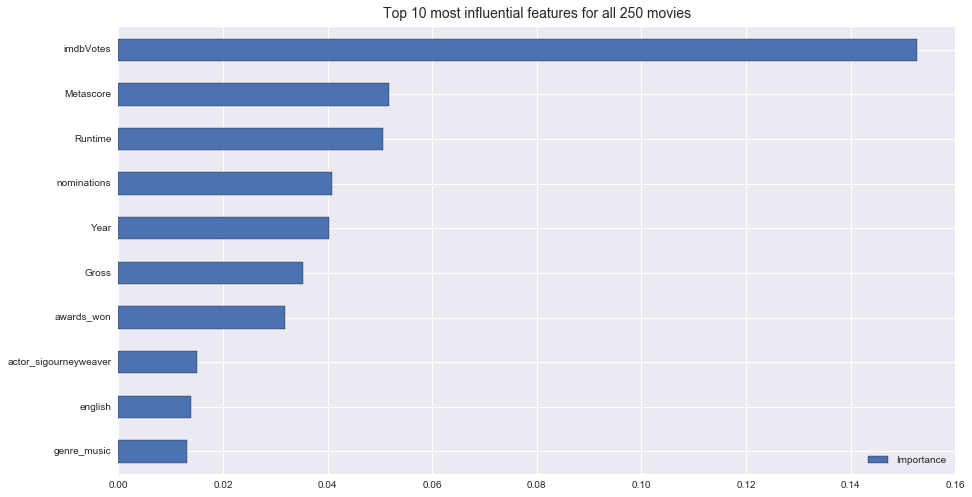

In [543]:
# Plotting feature importance

ax = gb_features.head(10).sort_values('Importance').plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 10 most influential features for all 250 movies', y = 1.01, size = 14)

## Modelling without outliers (Gross)

In [502]:
# Getting movies that are more than 3sd higher than the mean gross
# Removing outliers above 99.5th percentile

df[df['Gross'] > (df['Gross'].mean() + (3 * df['Gross'].std()))]

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations
3,"ChristianBale,HeathLedger,AaronEckhart,Michael...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA,UK",ChristopherNolan,"Action,Crime,Drama","English, Mandarin",0.221860,When the menace known as the Joker wreaks havo...,PG-13,2008-07-18,...,0.994905,tt0468569,9.0,3.811175,3.466991,dolbydigital sdds dts,0.375981,-0.491172,3.289403,2.215787
160,"HarrisonFord,MarkHamill,CarrieFisher,AdamDriver",Nominated for 5 Oscars. Another 47 wins & 104 ...,USA,J.J.Abrams,"Action,Adventure,Fantasy",English,0.127347,Three decades after the defeat of the Galactic...,PG-13,2015-12-18,...,1.284218,tt2488496,8.2,0.513968,6.724674,12trackdigitalsound dolbyatmos dolbysurround7...,-0.598063,2.594081,0.527871,1.420638
246,"RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",Nominated for 1 Oscar. Another 34 wins & 75 no...,USA,JossWhedon,"Action,Sci-Fi,Thriller","English, Russian",-1.006814,Earth's mightiest heroes must come together an...,PG-13,2012-05-04,...,1.160227,tt0848228,8.1,1.769782,4.193657,datasat dolbydigital dolbysurround7.1,-0.598063,0.125878,0.165246,0.813814


In [493]:
# No shows on the other end of the spectrum, i.e. 0.5th percentile

df[df['Gross'] < (df['Gross'].mean() - (3 * df['Gross'].std()))]

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations


In [507]:
X_99 = X[X['Gross'] < (X['Gross'].mean() + (3 * X['Gross'].std()))]

In [503]:
y_99 = y.copy()

In [509]:
y_99.drop([3,160,246], inplace=True)

In [518]:
gsgb.fit(X_99, y_99)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475]), 'loss': ['ls', 'lad', 'huber', 'quantile'], 'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [519]:
gb99_best = gsgb.best_estimator_

In [587]:
score = cross_val_score(gb99_best, X_99, y_99, scoring='neg_mean_squared_error', cv = 10)

model_performance.append(['GB_99_with_GSCV', score.mean(), score.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = False, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
15,GB_99_with_GSCV,-0.034255,0.032507
12,GB_with_GSCV,-0.037750,0.037261
3,GradientBoostingRegressor,-0.038576,0.043393
8,GradientBoostingRegressor+ Bagging,-0.042402,0.055712
11,RF_with_GSCV,-0.042520,0.051308
1,RandomForestRegressor,-0.042684,0.047705
6,RandomForestRegressor+ Bagging,-0.043925,0.057082
5,DecisionTreeRegressor+ Bagging,-0.045376,0.051665
9,AdaBoostRegressor+ Bagging,-0.046592,0.065447
4,AdaBoostRegressor,-0.046720,0.064384


In [588]:
gb99_features = pd.DataFrame(gb99_best.feature_importances_, index = X.columns, columns = ['Importance'])
gb99_features.sort_values('Importance', ascending = False, inplace = True)
gb99_features.head(10)

,Importance
imdbVotes,0.101568
Gross,0.070794
nominations,0.053805
Runtime,0.051007
Year,0.049386
Metascore,0.040580
awards_won,0.027717
nom_oscar,0.014634
win_oscar,0.012832
genre_sport,0.010806


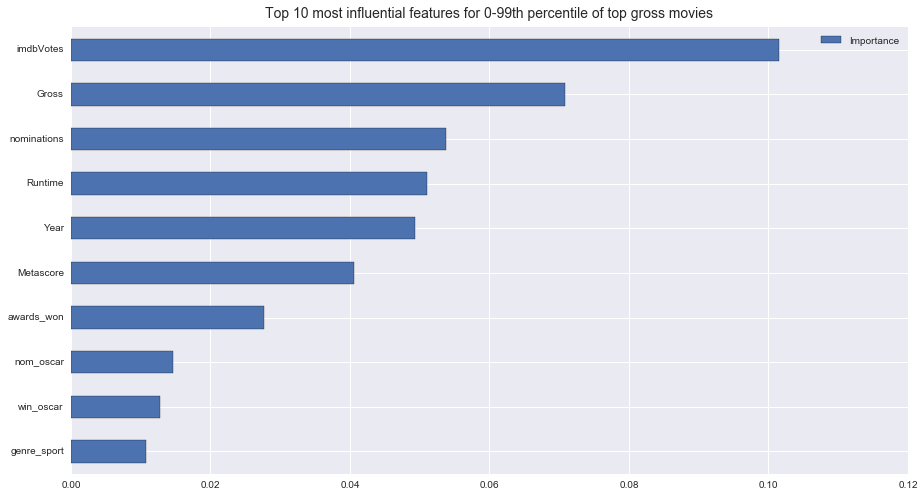

In [589]:
# Plotting feature importance

ax = gb99_features.head(10).sort_values('Importance').plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 10 most influential features for 0-99th percentile of top gross movies', y = 1.01, size = 14)

## Comments:

It seems like "IMDB Votes" is a direct determinant of the IMDB ratings. And since there is no way to know the votes of a movie before it is released, this should be excluded in the modeling, together with Metascore (ratings on RottenTomatoes).

## Removing movies over 99th percentile gross and "IMDB votes" + "Metascore" columns

In [547]:
X_99_no_vote = X_99.copy()

In [548]:
del X_99_no_vote['imdbVotes']
del X_99_no_vote['Metascore']

In [549]:
y_99_no_vote = y_99.copy()

In [550]:
gsgb.fit(X_99_no_vote,y_99_no_vote)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475]), 'loss': ['ls', 'lad', 'huber', 'quantile'], 'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [552]:
gsgb_99_no_vote = gsgb.best_estimator_

In [583]:
score = cross_val_score(gsgb_99_no_vote, X_99, y_99, scoring='neg_mean_squared_error', cv = 10)

model_performance.append(['GB_99_no_vote_with_GSCV', score.mean(), score.std()])


#result = plain_model(gsgb_99_no_vote)
#model_performance.append(['GB_99_no_vote_with_GSCV', result.mean(), result.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = False, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
12,GB_with_GSCV,-0.037750,0.037261
3,GradientBoostingRegressor,-0.038576,0.043393
8,GradientBoostingRegressor+ Bagging,-0.042402,0.055712
11,RF_with_GSCV,-0.042520,0.051308
1,RandomForestRegressor,-0.042684,0.047705
6,RandomForestRegressor+ Bagging,-0.043925,0.057082
5,DecisionTreeRegressor+ Bagging,-0.045376,0.051665
9,AdaBoostRegressor+ Bagging,-0.046592,0.065447
4,AdaBoostRegressor,-0.046720,0.064384
13,GB_99_no_vote_with_GSCV,-0.046897,0.060102


In [584]:
gsgb_99_no_vote_features = pd.DataFrame(gsgb_99_no_vote.feature_importances_, index = X_99_no_vote.columns, columns = ['Importance'])
gsgb_99_no_vote_features.sort_values('Importance', ascending = False, inplace = True)
gsgb_99_no_vote_features.head(10)

,Importance
Runtime,0.049758
awards_won,0.049726
Year,0.048504
nominations,0.045808
Gross,0.043066
nom_oscar,0.022993
win_oscar,0.022240
dir_christophernolan,0.018365
actor_timroth,0.016091
italian,0.013481


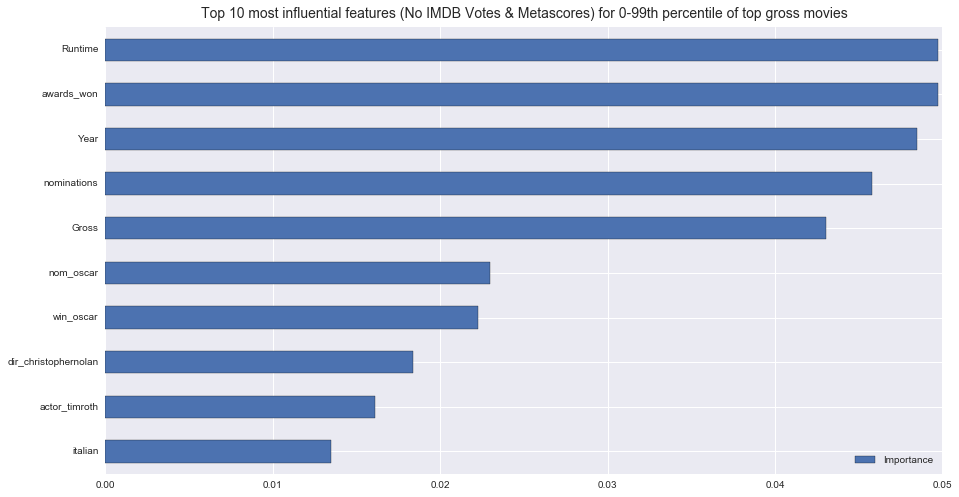

In [585]:
# Plotting feature importance

ax = gsgb_99_no_vote_features.head(10).sort_values('Importance').plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 10 most influential features (No IMDB Votes & Metascores) for 0-99th percentile of top gross movies', y = 1.01, size = 14)

## Checking the performance for only top 25 features (without IMBD Votes and Metascore)

In [566]:
top25_list = gsgb_99_no_vote_features.head(25).index
top25_list

Index([             u'Runtime',           u'awards_won',
                       u'Year',          u'nominations',
                      u'Gross',            u'nom_oscar',
                  u'win_oscar', u'dir_christophernolan',
              u'actor_timroth',              u'italian',
          u'dir_frankdarabont',       u'actor_bradpitt',
         u'dir_robertzemeckis',       u'dolbysurround7',
                       u'sdds',     u'dir_williamwyler',
                   u'APPROVED', u'actor_carrieannemoss',
            u'dir_billywilder',                   u'uk',
              u'genre_mystery',      u'actor_seanastin',
                u'genre_music',      u'title_godfather',
         u'dir_charleschaplin'],
      dtype='object')

In [568]:
X_25 = X_99_no_vote[top25_list]

In [569]:
X_25.head()

,Runtime,awards_won,Year,nominations,Gross,nom_oscar,win_oscar,dir_christophernolan,actor_timroth,italian,...,APPROVED,actor_carrieannemoss,dir_billywilder,uk,genre_mystery,actor_seanastin,genre_music,title_godfather,title_godfather,dir_charleschaplin
0,0.415256,-0.281063,0.416280,-0.127810,-0.611860,3.828183,-0.598063,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
1,1.447454,-0.141591,-0.492989,-0.190585,0.248219,-0.491172,0.863004,0,0,1,...,0.0,0,0,0,0,0,0,1,1,0
2,2.291980,-0.504217,-0.410328,-0.337059,-0.377952,-0.491172,2.324071,0,0,1,...,0.0,0,0,0,0,0,0,1,1,0
4,-1.023565,-0.336851,-1.112945,-0.588159,0.366937,1.359980,-0.598063,0,0,0,...,1.0,0,0,0,0,0,0,0,0,0
5,2.073029,1.197333,0.374949,-0.065035,-0.064817,-0.491172,2.811093,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0


In [570]:
gsgb.fit(X_25,y_99_no_vote)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475]), 'loss': ['ls', 'lad', 'huber', 'quantile'], 'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [571]:
gsgb_25 = gsgb.best_estimator_

In [586]:
score = cross_val_score(gsgb_25, X_25, y_99, scoring='neg_mean_squared_error', cv = 10)

model_performance.append(['GB_99_no_vote_with_GSCV_only25feat', score.mean(), score.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = False, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
12,GB_with_GSCV,-0.037750,0.037261
3,GradientBoostingRegressor,-0.038576,0.043393
8,GradientBoostingRegressor+ Bagging,-0.042402,0.055712
11,RF_with_GSCV,-0.042520,0.051308
1,RandomForestRegressor,-0.042684,0.047705
6,RandomForestRegressor+ Bagging,-0.043925,0.057082
5,DecisionTreeRegressor+ Bagging,-0.045376,0.051665
9,AdaBoostRegressor+ Bagging,-0.046592,0.065447
4,AdaBoostRegressor,-0.046720,0.064384
13,GB_99_no_vote_with_GSCV,-0.046897,0.060102


In [590]:
gsgb_25_features = pd.DataFrame(gsgb_25.feature_importances_, index = X_25.columns, columns = ['Importance'])
gsgb_25_features.sort_values('Importance', ascending = False, inplace = True)
gsgb_25_features.head(10)

,Importance
Gross,0.188692
Runtime,0.154062
Year,0.118871
nominations,0.112847
awards_won,0.109566
nom_oscar,0.035008
actor_timroth,0.033834
win_oscar,0.027423
genre_music,0.026229
actor_carrieannemoss,0.022706


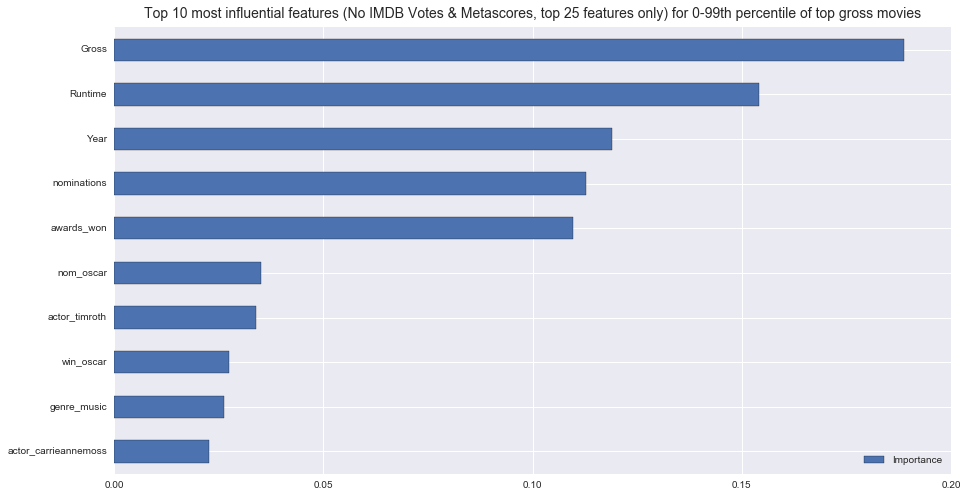

In [591]:
# Plotting feature importance

ax = gsgb_25_features.head(10).sort_values('Importance').plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 10 most influential features (No IMDB Votes & Metascores, top 25 features only) for 0-99th percentile of top gross movies', y = 1.01, size = 14)